In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table, vstack
from astropy.io import fits
import astropy.units as u

import gala.coordinates as gc

In [3]:
plt.style.use('notebook')

In [4]:
t = Table(fits.getdata('../data/pal5_ls_lite_grz.fits'))

In [5]:
points = np.array([t['g'] - t['r'], t['g']]).T

In [6]:
ceq = coord.SkyCoord(ra=t['ra']*u.deg, dec=t['dec']*u.deg, frame='icrs')
cpal = ceq.transform_to(gc.Pal5)

wangle = 180*u.deg

In [7]:
ra0 = 229.022083*u.deg
dec0 = -0.111389*u.deg
cluster_mask = np.sqrt((ceq.ra-ra0)**2 + (ceq.dec-dec0)**2)<0.5*u.deg

## Isochrones

In [8]:
# iso = Table.read('../data/mist_12.0_-1.50.cmd', format='ascii.commented_header', header_start=12)
iso = Table.read('../data/mist_11.5_-1.30.cmd', format='ascii.commented_header', header_start=12)
phasecut = (iso['phase']>=0) & (iso['phase']<5)
iso = iso[phasecut]

In [9]:
# distance modulus
distance_app = 22.5*u.kpc
# distance_app = 18.6*u.kpc
dm = 5*np.log10((distance_app.to(u.pc)).value)-5

# main sequence + rgb
i_gr = iso['DECam_g']-iso['DECam_r'] + 0.06
i_rz = iso['DECam_r']-iso['DECam_z'] + 0.06
i_g = iso['DECam_g']+dm
i_r = iso['DECam_r']+dm
i_z = iso['DECam_z']+dm

i_left = i_gr - 0.12*(i_g/28)**5
i_right = i_gr + 0.12*(i_g/28)**5

# poly = np.hstack([np.array([i_left, i_g]), np.array([i_right[::-1], i_g[::-1]])]).T
# ind = (poly[:,1]<23.7) & (poly[:,1]>20)
# poly_main = poly[ind]
# path_main = mpl.path.Path(poly_main)

### Plot CMDs

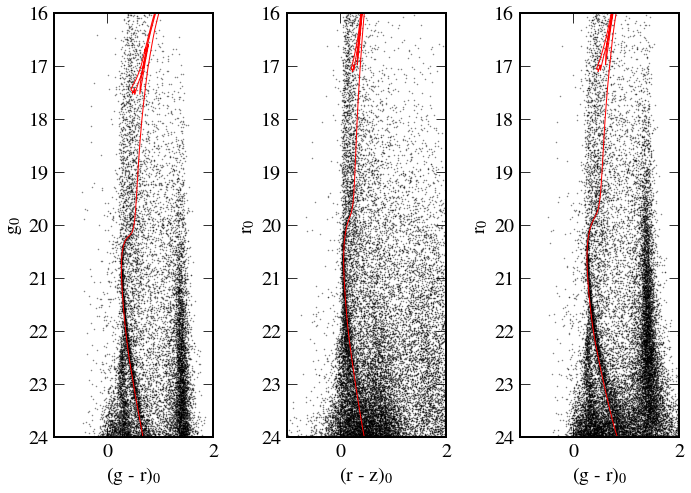

In [10]:
fig, ax = plt.subplots(1,3,figsize=(10,10))

plt.sca(ax[0])
plt.plot(t['g'][cluster_mask] - t['r'][cluster_mask], t['g'][cluster_mask], 'k.', ms=1, alpha=0.5, zorder=0)
plt.plot(i_gr, i_g, 'r-', lw=1, zorder=1)

plt.xlim(-1,2)
plt.ylim(24,16)
plt.gca().set_aspect('equal')
plt.xlabel('(g - r)$_0$')
plt.ylabel('$g_0$')

plt.sca(ax[1])
plt.plot(t['r'][cluster_mask] - t['z'][cluster_mask], t['r'][cluster_mask], 'k.', ms=1, alpha=0.5, zorder=0)
plt.plot(i_rz, i_r, 'r-', lw=1, zorder=1)

plt.xlim(-1,2)
plt.ylim(24,16)
plt.gca().set_aspect('equal')
plt.xlabel('(r - z)$_0$')
plt.ylabel('$r_0$')

plt.sca(ax[2])
plt.plot(t['g'][cluster_mask] - t['r'][cluster_mask], t['r'][cluster_mask], 'k.', ms=1, alpha=0.5, zorder=0)
plt.plot(i_gr, i_r, 'r-', lw=1, zorder=1)

plt.xlim(-1,2)
plt.ylim(24,16)
plt.gca().set_aspect('equal')
plt.xlabel('(g - r)$_0$')
plt.ylabel('$r_0$')

plt.tight_layout()

### Filter

In [11]:
i_left = i_gr - 0.12*(i_g/28)**5
i_right = i_gr + 0.12*(i_g/28)**5

poly = np.hstack([np.array([i_left, i_g]), np.array([i_right[::-1], i_g[::-1]])]).T
ind = (poly[:,1]<23.7) & (poly[:,1]>20)
poly_main = poly[ind]
path_main = mpl.path.Path(poly_main)

In [12]:
cmd_mask = path_main.contains_points(points)

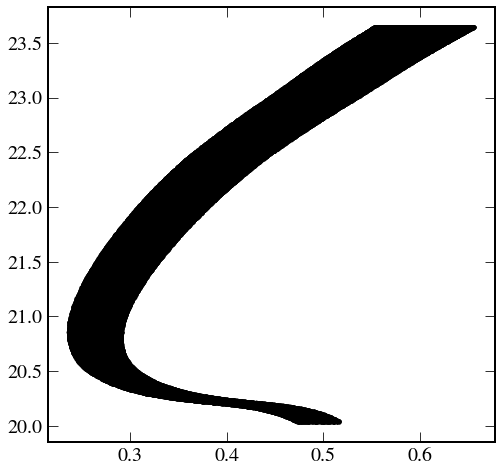

In [13]:
plt.plot(t['g'][cmd_mask] - t['r'][cmd_mask], t['g'][cmd_mask], 'k.')

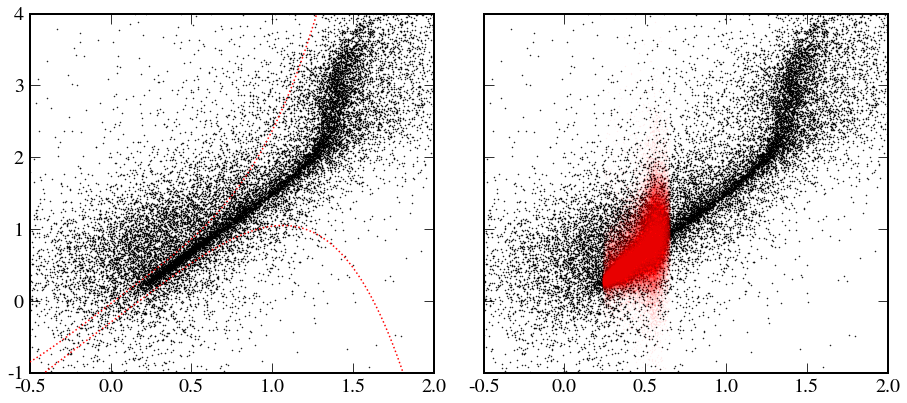

In [42]:
gr_grid = np.linspace(-0.5, 2, 100)
p = np.array([1.7,-0.17])
grz_poly = np.poly1d(p)
np.save('../data/grz_poly', grz_poly)
gz_grid = grz_poly(gr_grid)

fig, ax = plt.subplots(1,2,figsize=(13,6), sharex=True, sharey=True)

plt.sca(ax[0])
plt.plot(t['g'][::1000] - t['r'][::1000], t['g'][::1000] - t['z'][::1000], 'k.', ms=1)
plt.plot(gr_grid, gz_grid+0.13 + 0.7*gr_grid**4 + 0.01*gr_grid, 'r:', zorder=10)
plt.plot(gr_grid, gz_grid-0.13 - 0.35*gr_grid**4 - 0.01*gr_grid, 'r:', zorder=10)
# plt.plot(gr_grid, gz_grid, 'r-', zorder=10)

plt.sca(ax[1])
plt.plot(t['g'][::1000] - t['r'][::1000], t['g'][::1000] - t['z'][::1000], 'k.', ms=1)
plt.plot(t['g'][cmd_mask] - t['r'][cmd_mask], t['g'][cmd_mask] - t['z'][cmd_mask], 'r.', ms=1, alpha=0.05)

plt.xlim(-0.5,2)
plt.ylim(-1,4)

plt.tight_layout()

In [69]:
gz = t['g'] - t['z']
gr = t['g'] - t['r']
grz_mask = (gz<grz_poly(gr)+0.1) & (gz>grz_poly(gr)-0.1)

/home/ana/install/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]
/home/ana/install/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/home/ana/install/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


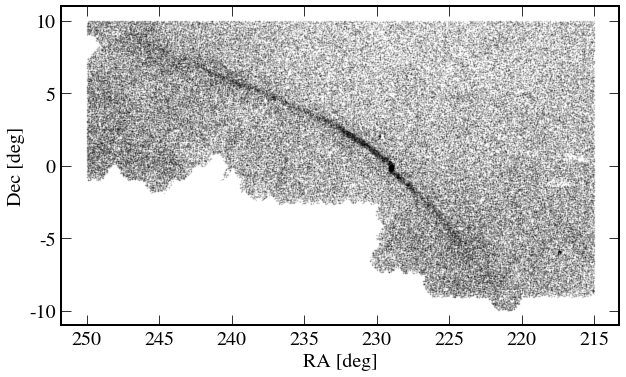

In [70]:
fig, ax = plt.subplots(1,1,figsize=(10,15))

plt.plot(ceq.ra[cmd_mask & grz_mask], ceq.dec[cmd_mask & grz_mask], 'k.', ms=1, alpha=0.15)

plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')

plt.gca().invert_xaxis()
plt.gca().set_aspect('equal')
# plt.savefig('../plots/decals_pal5_masks.png', dpi=150)